<a href="https://colab.research.google.com/github/shaikfatima3097/Machine_learning/blob/main/Train_a_simple_linear_regression_model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**predicting whether dogs are in a state of wellness or illness**

We'll train a simple linear regression model to predict body temperature based on dogs' ages and interpret the result

**Loading data**

In [4]:
import pandas as pd
# Convert it into a table using pandas
dataset = pd.read_csv("doggy-illness.csv", delimiter="\t") #'\t' indicates that tabs are used as delimiters.

# Print the data
print(dataset)

    male  attended_training  age  body_fat_percentage  core_temperature  \
0      0                  1  6.9                   38         38.423169   
1      0                  1  5.4                   32         39.015998   
2      1                  1  5.4                   12         39.148341   
3      1                  0  4.8                   23         39.060049   
4      1                  0  4.8                   15         38.655439   
..   ...                ...  ...                  ...               ...   
93     0                  0  4.5                   38         37.939942   
94     1                  0  1.8                   11         38.790426   
95     0                  0  6.6                   20         39.489962   
96     0                  0  6.9                   32         38.575742   
97     1                  1  6.0                   21         39.766447   

    ate_at_tonys_steakhouse  needed_intensive_care  \
0                         0                  

**Data visualization**

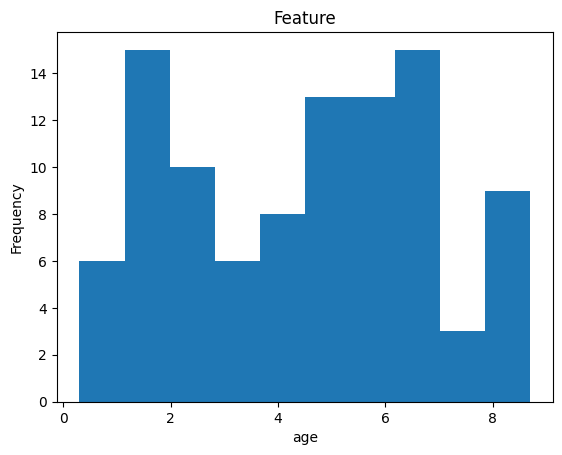

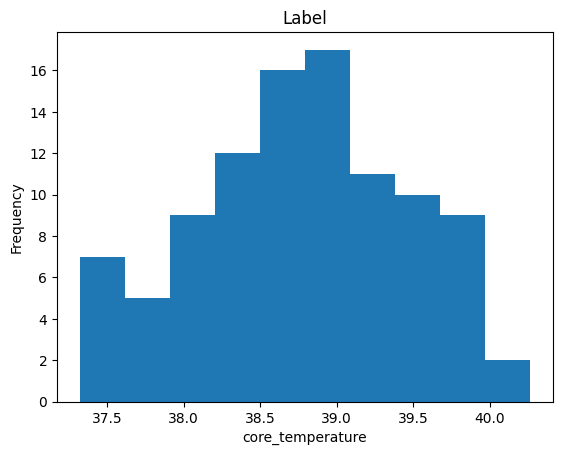

In [5]:
import matplotlib.pyplot as plt

def histogram(data, label_x, nbins, title, show=True):
    plt.hist(data[label_x], nbins)
    plt.title(title)
    plt.xlabel(label_x)
    plt.ylabel('Frequency')
    if show:
        plt.show()

# Example usage:
histogram(dataset, 'age', 10, 'Feature')
histogram(dataset, 'core_temperature', 10, 'Label')

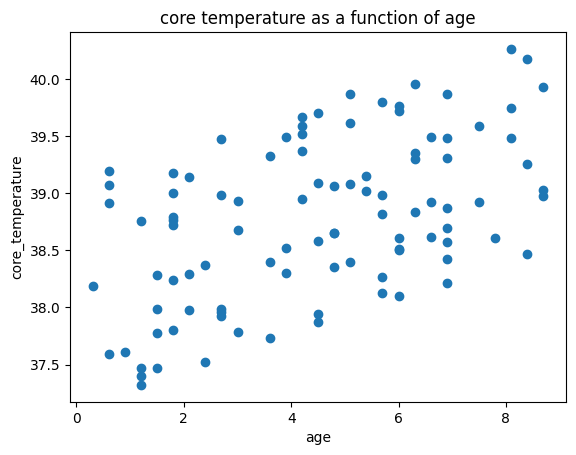

In [6]:
plt.scatter(dataset['age'], dataset['core_temperature'])
plt.title('core temperature as a function of age')
plt.xlabel('age')
plt.ylabel('core_temperature')
plt.show()

**Simple linear regression**

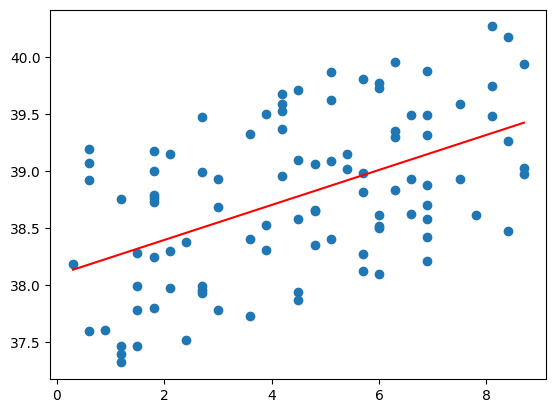

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.formula.api import ols

# Perform linear regression
formula = "core_temperature ~ age" # y = f(x)
model = ols(formula, data=dataset).fit()

# Create scatter plot with trendline
x = dataset['age']
y = dataset['core_temperature']
x_trendline = np.linspace(x.min(), x.max(), 100) # creates an array of 100 evenly spaced values between the minimum and maximum ages
y_trendline = model.params[1]*x_trendline + model.params[0] #y=mx+c
plt.scatter(x, y)
plt.plot(x_trendline, y_trendline, color='red')
plt.show()

**Interpreting our model**

In [8]:
print("Intercept:", model.params[0], "Slope:", model.params[1])

Intercept: 38.087867548892085 Slope: 0.15333957754731864


In [9]:
def estimate_temperature(age):
    # Model param[0] is the intercepts and param[1] is the slope
    return age * model.params[1] + model.params[0]

print("Estimate temperature from age")
print(estimate_temperature(age=6))

Estimate temperature from age
39.007905014175996


In [ ]:
import matplotlib.pyplot as plt
def scatter_2D(data,label_x,label_y,shaow=True):
    plt.scatter(data[label_x],data[label_y])
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title